In [2]:
import scanpy as sc
import scipy.io
import pandas as pd

# Define the file paths
matrix_file = 'C:\\Users\\Syrin\\OneDrive\\Bureau\\Syrine\\projects\\single_cell\\matrix.mtx'
features_file = 'C:\\Users\\Syrin\\OneDrive\\Bureau\\Syrine\\projects\\single_cell\\features.tsv'
barcodes_file = 'C:\\Users\\Syrin\\OneDrive\\Bureau\\Syrine\\projects\\single_cell\\barcodes.tsv'

# Load the matrix file (MTX)
matrix = scipy.io.mmread(matrix_file).T.tocsr()  # Transpose the matrix to get cells as rows

# Load the features and barcodes
features = pd.read_csv(features_file, header=None, sep='\t')
barcodes = pd.read_csv(barcodes_file, header=None, sep='\t')

# Create the AnnData object
adata = sc.AnnData(X=matrix)
adata.var_names = features[1]  # Assuming the second column contains gene names
adata.var['gene_ids'] = features[0]  # Assuming the first column contains gene IDs
adata.obs_names = barcodes[0]  # The cell barcodes

# Inspect the data
print(adata)


AnnData object with n_obs × n_vars = 6956 × 33538
    var: 'gene_ids'


In [3]:
# Primary data matrix (cells x genes)
adata.X.shape



(6956, 33538)

In [4]:
# Metadata about cells
adata.obs.head()

""
AAACCTGAGAGGTTGC-1
AAACCTGAGCGATTCT-1
AAACCTGAGGAGTCTG-1
AAACCTGCAAACGTGG-1
AAACCTGCAATAAGCA-1


In [5]:
# Metadata about genes
adata.var.head()

,gene_ids
MIR1302-2HG,NaN
FAM138A,NaN
OR4F5,NaN
AL627309.1,NaN
AL627309.3,NaN


In [6]:
# Unstructured data
adata.uns.keys()

odict_keys([])

In [7]:
# PCA coordinates (if calculated and stored in obsm)
if 'X_pca' in adata.obsm.keys():
    print(adata.obsm['X_pca'])

# Raw counts (if stored in layers)
if 'raw_counts' in adata.layers.keys():
    print(adata.layers['raw_counts'].shape)


In [8]:
# View the shape of the data matrix (number of cells x number of genes)
print("Data matrix shape (cells x genes):", adata.shape)

# Inspect the first few cell barcodes and gene names
print("First 5 cell barcodes:", adata.obs_names[:5])
print("First 5 gene names:", adata.var_names[:5])

# Summary statistics
adata.obs['n_genes'] = (adata.X > 0).sum(1)  # Number of genes per cell
adata.obs['n_counts'] = adata.X.sum(1)  # Total counts per cell
print("Summary of the first 5 cells:")
print(adata.obs[['n_genes', 'n_counts']].head())


Data matrix shape (cells x genes): (6956, 33538)
First 5 cell barcodes: Index(['AAACCTGAGAGGTTGC-1', 'AAACCTGAGCGATTCT-1', 'AAACCTGAGGAGTCTG-1',
       'AAACCTGCAAACGTGG-1', 'AAACCTGCAATAAGCA-1'],
      dtype='object')
First 5 gene names: Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3'], dtype='object')
Summary of the first 5 cells:
                    n_genes  n_counts
AAACCTGAGAGGTTGC-1     2386      8910
AAACCTGAGCGATTCT-1     2886     12211
AAACCTGAGGAGTCTG-1      709      1358
AAACCTGCAAACGTGG-1      387       788
AAACCTGCAATAAGCA-1     2480      9876


In [9]:
# Inspect the updated metadata for cells
print("Updated metadata for cells:")
adata.obs.head()


Updated metadata for cells:


,n_genes,n_counts
AAACCTGAGAGGTTGC-1,2386,8910
AAACCTGAGCGATTCT-1,2886,12211
AAACCTGAGGAGTCTG-1,709,1358
AAACCTGCAAACGTGG-1,387,788
AAACCTGCAATAAGCA-1,2480,9876


In [10]:
import numpy as np

# Calculate the number of genes detected in each cell
adata.obs['n_genes'] = (adata.X > 0).sum(1)

# Calculate the total UMI counts per cell
adata.obs['n_counts'] = adata.X.sum(1)

# Identify mitochondrial genes (assuming 'MT-' prefix for mitochondrial genes)
mito_genes = adata.var_names.str.startswith('MT-')

# Calculate the percentage of mitochondrial genes per cell
adata.obs['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)

# Inspect the updated metadata for cells
print("Updated metadata for cells:")
adata.obs.head()

Updated metadata for cells:


,n_genes,n_counts,percent_mito
AAACCTGAGAGGTTGC-1,2386,8910,0.020539
AAACCTGAGCGATTCT-1,2886,12211,0.016461
AAACCTGAGGAGTCTG-1,709,1358,0.052283
AAACCTGCAAACGTGG-1,387,788,0.238579
AAACCTGCAATAAGCA-1,2480,9876,0.019745


# Quality metrics VIZ 

In [11]:
import plotly.express as px

# Create a histogram for UMI counts using Plotly
fig = px.histogram(
    adata.obs, 
    x='n_counts', 
    nbins=50, 
    title='Distribution of UMI Counts per Cell',
    labels={'n_counts': 'Total UMI Counts', 'count': 'Number of Cells'},
    color_discrete_sequence=px.colors.qualitative.Vivid
)

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Total UMI Counts',
    yaxis_title='Number of Cells',
    bargap=0.1,  # Adjusts the gap between bars
    template='plotly_dark'  # A vibrant and dark theme
)

fig.show()


In [12]:
fig_genes = px.histogram(
    adata.obs, 
    x='n_genes', 
    nbins=50, 
    title='Distribution of Genes Detected per Cell',
    labels={'n_genes': 'Number of Genes Detected', 'count': 'Number of Cells'},
    color_discrete_sequence=px.colors.qualitative.Vivid
)

# Update layout for a light background
fig_genes.update_layout(
    xaxis_title='Number of Genes Detected',
    yaxis_title='Number of Cells',
    bargap=0.1,
    template='plotly_dark'  # Light background theme
)

fig_genes.show()


In [13]:
fig_mito = px.histogram(
    adata.obs, 
    x='percent_mito', 
    nbins=50, 
    title='Distribution of Mitochondrial Gene Content per Cell',
    labels={'percent_mito': 'Percentage of Mitochondrial Gene Content', 'count': 'Number of Cells'},
    color_discrete_sequence=px.colors.qualitative.Vivid
)

# Update layout for a light background
fig_mito.update_layout(
    xaxis_title='Percentage of Mitochondrial Gene Content',
    yaxis_title='Number of Cells',
    bargap=0.1,
    template='plotly_dark'  # Light background theme
)

fig_mito.show()


# QC

In [14]:
# Filter cells based on the thresholds
adata = adata[(adata.obs['n_counts'] > 1000) & 
              (adata.obs['n_genes'] > 200) & 
              (adata.obs['n_genes'] < 2500) & 
              (adata.obs['percent_mito'] < 0.05), :]

# Filter out genes that are detected in fewer than 3 cells
sc.pp.filter_genes(adata, min_cells=3)

# Inspect the data after filtering
adata.shape


c:\Users\Syrin\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\preprocessing\_simple.py:282: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.

c:\Users\Syrin\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning:

Variable names are not unique. To make them unique, call `.var_names_make_unique`.

c:\Users\Syrin\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning:

Variable names are not unique. To make them unique, call `.var_names_make_unique`.



(2259, 15114)

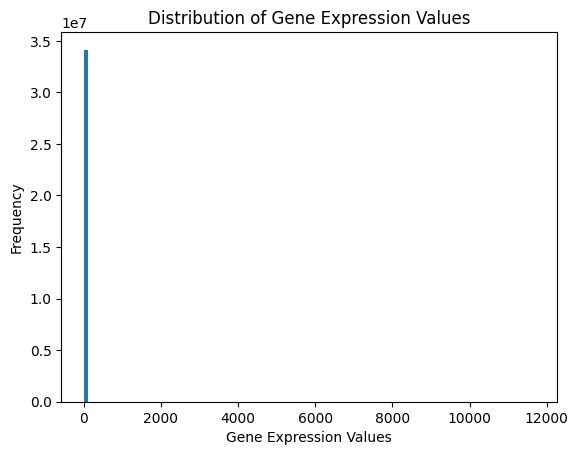

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Convert sparse matrix to a dense format
dense_data = adata.X.toarray()

# Plot the distribution of values in the dense data matrix
plt.hist(dense_data.flatten(), bins=100)
plt.xlabel('Gene Expression Values')
plt.ylabel('Frequency')
plt.title('Distribution of Gene Expression Values')
plt.show()


In [16]:
# Normalize the data to 10,000 counts per cell
sc.pp.normalize_total(adata, target_sum=1e4)

# Log-transform the data
sc.pp.log1p(adata)


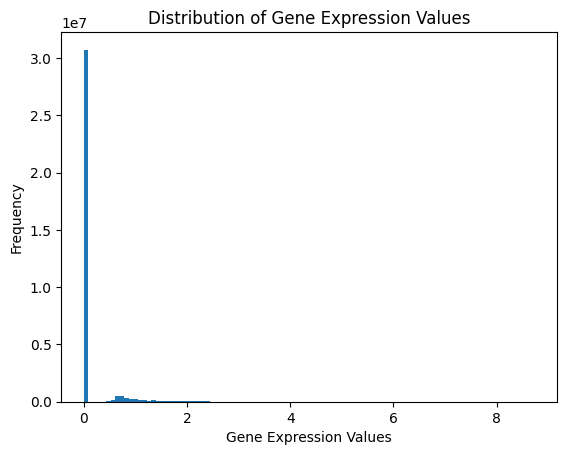

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Convert sparse matrix to a dense format
dense_data = adata.X.toarray()

# Plot the distribution of values in the dense data matrix
plt.hist(dense_data.flatten(), bins=100)
plt.xlabel('Gene Expression Values')
plt.ylabel('Frequency')
plt.title('Distribution of Gene Expression Values')
plt.show()

In [18]:
# Perform PCA
sc.tl.pca(adata, svd_solver='arpack')

# Visualize the explained variance by each principal component using Plotly
import plotly.graph_objs as go

fig_pca = go.Figure(
    go.Scatter(
        x=list(range(1, len(adata.uns['pca']['variance_ratio']) + 1)),
        y=adata.uns['pca']['variance_ratio'],
        mode='lines+markers',
        marker=dict(color='blue'),
        line=dict(color='blue', width=2)
    )
)

fig_pca.update_layout(
    title='Explained Variance by Principal Components',
    xaxis_title='Principal Component',
    yaxis_title='Variance Ratio',
    template='plotly_white'
)

fig_pca.show()


In [19]:
# Use the first 20 PCs for clustering
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)

# Perform clustering using the Leiden algorithm
sc.tl.leiden(adata)

# Check the number of clusters
adata.obs['leiden'].value_counts()


c:\Users\Syrin\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



C:\Users\Syrin\AppData\Local\Temp\ipykernel_12296\4273383777.py:5: FutureWarning:

In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.



leiden
0     349
1     280
2     242
3     217
4     196
5     186
6     171
7     139
8     116
9      92
10     73
11     70
12     67
13     35
14     26
Name: count, dtype: int64

In [20]:
# Compute UMAP for visualization
sc.tl.umap(adata)

# Visualize the clusters using Plotly
import plotly.express as px

# Create a UMAP plot with vibrant colors
fig_umap = px.scatter(
    x=adata.obsm['X_umap'][:, 0], 
    y=adata.obsm['X_umap'][:, 1], 
    color=adata.obs['leiden'],
    labels={'color': 'Cluster'},
    title='UMAP Visualization of Cell Clusters',
    color_discrete_sequence=px.colors.qualitative.Vivid,
    template='plotly_white'
)

fig_umap.update_layout(
    xaxis_title='UMAP 1',
    yaxis_title='UMAP 2'
)

fig_umap.show()


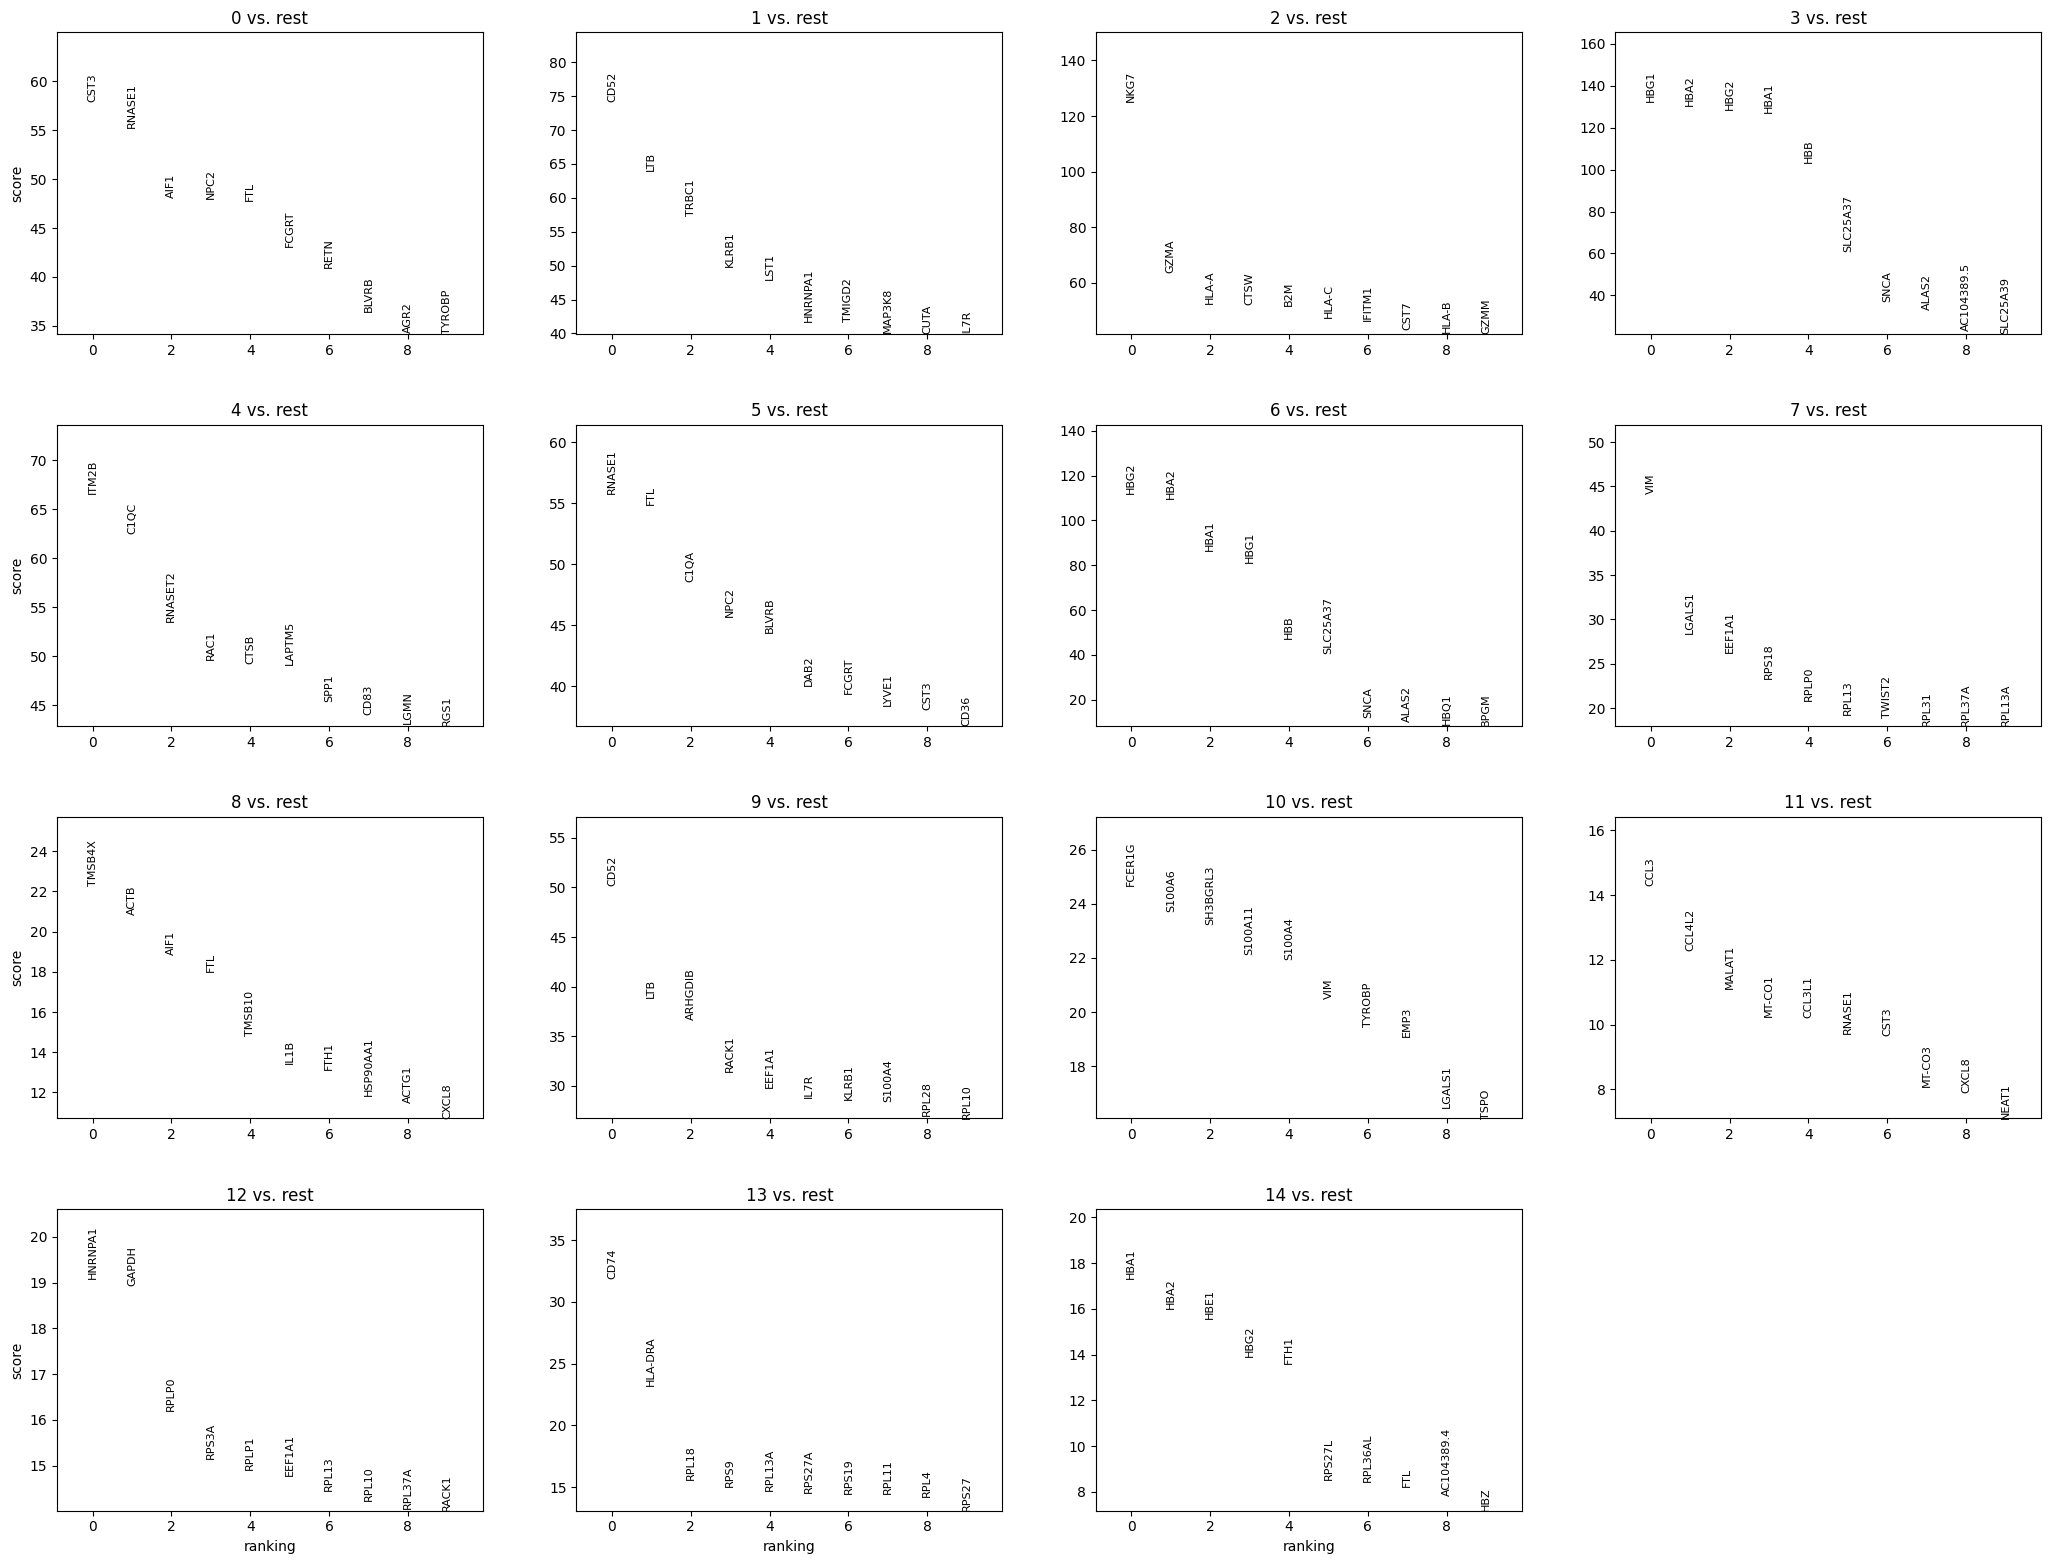

In [21]:
# Identify marker genes for each cluster using the 't-test' method
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

# View the top marker genes for each cluster
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)


In [22]:
# Extract top marker genes for smaller clusters (e.g., clusters 12, 13, 14)
for cluster in ['12', '13', '14']:
    print(f"Top marker genes for cluster {cluster}:")
    markers = adata.uns['rank_genes_groups']['names'][cluster][:10]
    print(markers)


Top marker genes for cluster 12:
['HNRNPA1' 'GAPDH' 'RPLP0' 'RPS3A' 'RPLP1' 'EEF1A1' 'RPL13' 'RPL10'
 'RPL37A' 'RACK1']
Top marker genes for cluster 13:
['CD74' 'HLA-DRA' 'RPL18' 'RPS9' 'RPL13A' 'RPS27A' 'RPS19' 'RPL11' 'RPL4'
 'RPS27']
Top marker genes for cluster 14:
['HBA1' 'HBA2' 'HBE1' 'HBG2' 'FTH1' 'RPS27L' 'RPL36AL' 'FTL' 'AC104389.4'
 'HBZ']


In [23]:
import scanpy as sc
import pandas as pd

# Assuming you have already loaded your AnnData object as `adata`

# Step 1: Convert all columns in 'obs' to string type to avoid conversion errors
for col in adata.obs.columns:
    adata.obs[col] = adata.obs[col].astype(str)

# Step 2: Convert all columns in 'var' to string type to avoid conversion errors
for col in adata.var.columns:
    adata.var[col] = adata.var[col].astype(str)

# Step 3: Create the 'cell_type' and 'cell_type_hypotheses' columns (if they don't exist)
adata.obs['cell_type'] = 'Unknown'  # Initialize with a default value
adata.obs['cell_type_hypotheses'] = 'None'  # Initialize with a default value

# Step 4: Annotate Cluster 13 as NTK Cells
adata.obs.loc[adata.obs['leiden'] == '13', 'cell_type'] = 'NTK Cells'
secondary_hypotheses_13 = 'Macrophages, Monocytes'
adata.obs.loc[adata.obs['leiden'] == '13', 'cell_type_hypotheses'] = secondary_hypotheses_13

# Step 5: Annotate Cluster 12 as Leydig Precursor Cells
adata.obs.loc[adata.obs['leiden'] == '12', 'cell_type'] = 'Leydig Precursor Cells'
secondary_hypotheses_12 = 'Gonadal Mitotic Phase Fetal Germ Cells, Granulosa Cells'
adata.obs.loc[adata.obs['leiden'] == '12', 'cell_type_hypotheses'] = secondary_hypotheses_12

#annotate cluster 14 as Erythroblast
adata.obs.loc[adata.obs['leiden'] == '14', 'cell_type'] = 'Erythroblast'
secondary_hypotheses_12 = 'Red Blood Cell (Erythrocyte), NTK Cells'
adata.obs.loc[adata.obs['leiden'] == '14', 'cell_type_hypotheses'] = secondary_hypotheses_12


# Step 6: Save the updated AnnData object with annotations
adata.write('annotated_data_with_hypotheses.h5ad')

# Step 7: View the annotations for Clusters 12 and 13 to confirm
adata.obs.loc[adata.obs['leiden'].isin(['12', '13']), ['leiden','cell_type', 'cell_type_hypotheses']].head()






,leiden,cell_type,cell_type_hypotheses
AAACGGGTCGGCCGAT-1,12,Leydig Precursor Cells,"Gonadal Mitotic Phase Fetal Germ Cells, Granul..."
AAAGTAGGTAATCGTC-1,12,Leydig Precursor Cells,"Gonadal Mitotic Phase Fetal Germ Cells, Granul..."
AACTGGTCAGGAATGC-1,13,NTK Cells,"Macrophages, Monocytes"
AAGGCAGCAGAAGCAC-1,12,Leydig Precursor Cells,"Gonadal Mitotic Phase Fetal Germ Cells, Granul..."
AAGGCAGGTCGCCATG-1,13,NTK Cells,"Macrophages, Monocytes"


In [24]:

# Subset the AnnData object to include only cells from clusters 12, 13, and 14
subset_adata = adata[adata.obs['leiden'].isin(['12', '13', '14'])].copy()

# Save the subsetted AnnData object to a new file
subset_adata.write('subset_adata_clusters_12_13_14.h5ad')

# Confirm the subsetting by viewing the summary of the new AnnData object
print(subset_adata)


c:\Users\Syrin\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning:

Variable names are not unique. To make them unique, call `.var_names_make_unique`.



AnnData object with n_obs × n_vars = 128 × 15114
    obs: 'n_genes', 'n_counts', 'percent_mito', 'leiden', 'cell_type', 'cell_type_hypotheses'
    var: 'gene_ids', 'n_cells'
    uns: 'log1p', 'pca', 'neighbors', 'leiden', 'umap', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


In [25]:
subset_adata.shape

(128, 15114)

In [26]:
import scanpy as sc
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load your subset AnnData object
subset_adata = sc.read('subset_adata_clusters_12_13_14.h5ad')

# Extract the data (features) and annotations (labels)
X = subset_adata.X  # Gene expression data
y = subset_adata.obs['cell_type'].values  # Cell type annotations

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")




c:\Users\Syrin\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning:

Variable names are not unique. To make them unique, call `.var_names_make_unique`.



Accuracy: 0.9615384615384616
Confusion Matrix:
[[ 8  0  0]
 [ 0 11  0]
 [ 0  1  6]]


In [27]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Get the best parameters and train the final model
# best_model = grid_search.best_estimator_
# y_pred_best = best_model.predict(X_test)

# # Evaluate the tuned model
# accuracy_best = accuracy_score(y_test, y_pred_best)
# conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# print(f"Best Accuracy: {accuracy_best}")
# print(f"Best Confusion Matrix:\n{conf_matrix_best}")


In [30]:
import joblib
# Save the trained model to a file
joblib.dump(model, 'model.pkl')

print("Model saved as 'model.pkl'")


Model saved as 'model.pkl'
